In [2]:
import pandas

In [5]:
df = pandas.read_csv("datasets/mushroom_cleaned.csv")

In [6]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_and_preprocess_data(filepath):
    # Load dataset
    data = pd.read_csv(filepath)

    # Split features and labels
    X = data.drop(columns=['class'])
    y = data['class']

    # Standardize numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_encoded = tf.keras.utils.to_categorical(y_encoded)

    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test



# def load_and_preprocess_data(filepath):
#     # Load dataset
#     data = pd.read_csv(filepath)

#     # Split features and labels
#     X = data.drop(columns=['class'])
#     y = data['class']

#     # Standardize numerical features
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Encode labels
#     # label_encoder = LabelEncoder()
#     # y_encoded = label_encoder.fit_transform(y)
#     y_encoded = tf.keras.utils.to_categorical(y)

#     # Split data into train and test sets
#     x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#     return x_train, x_test, y_train, y_test

In [3]:
def create_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
def train(model, x_train, y_train):
    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=6,
                        validation_split=0.2,
                        verbose=1)
    return history

In [5]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
# Visualize confusion matrix and classification report
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    report = classification_report(y_true, y_pred_classes, digits=2)
    print("Classification Report:\n", report)


In [9]:
filepath = 'datasets/mushroom_cleaned.csv'
x_train, x_test, y_train, y_test = load_and_preprocess_data(filepath)
# input_shape = x_train.shape[1]
# num_classes = y_train.shape[1]
input_shape = 8
num_classes = 2

C:\Anaconda_Jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7318 - loss: 0.5194 - val_accuracy: 0.9049 - val_loss: 0.2438
Epoch 2/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8905 - loss: 0.2627 - val_accuracy: 0.9432 - val_loss: 0.1507
Epoch 3/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9274 - loss: 0.1816 - val_accuracy: 0.9593 - val_loss: 0.1061
Epoch 4/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9456 - loss: 0.1410 - val_accuracy: 0.9682 - val_loss: 0.0852
Epoch 5/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9550 - loss: 0.1133 - val_accuracy: 0.9707 - val_loss: 0.0774
Epoch 6/6
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9616 - loss: 0.0979 - val_accuracy: 0.9777 - val_loss: 0.0620


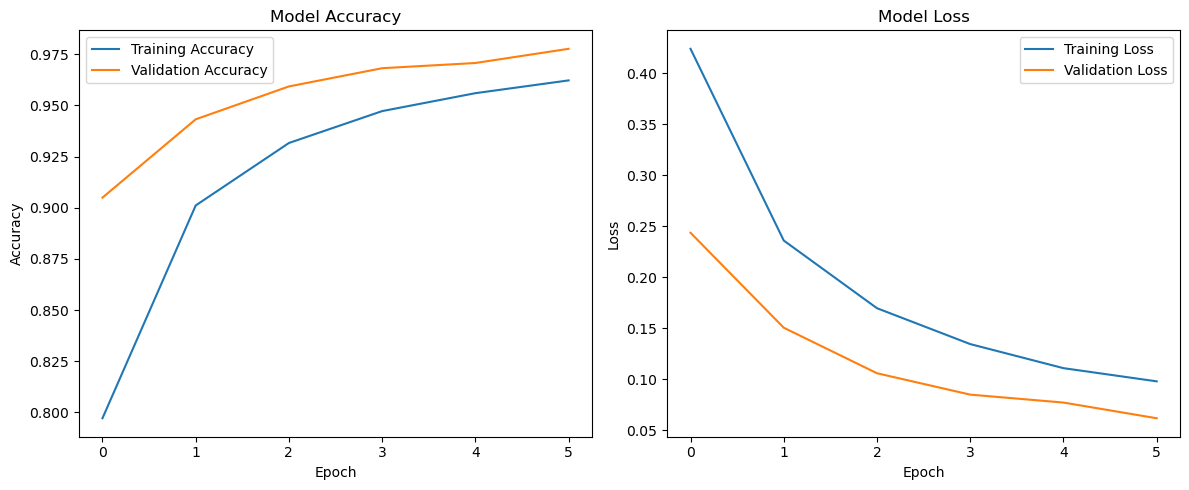

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


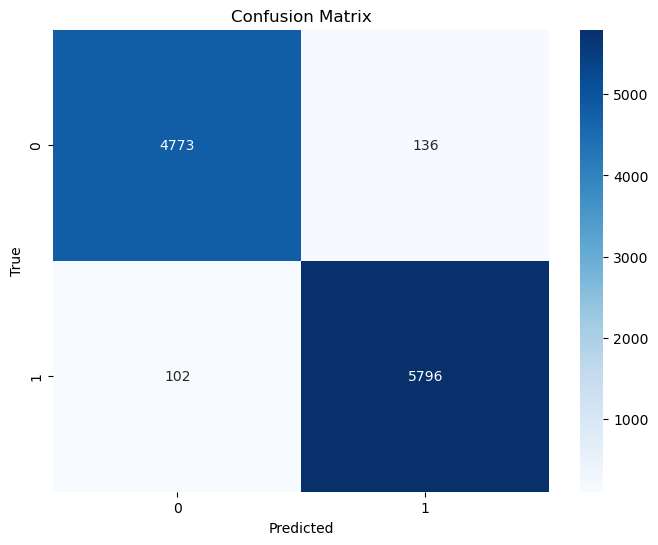

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



In [10]:
model = create_model(input_shape, num_classes)
history = train(model, x_train, y_train)
plot_history(history)
evaluate_model(model, x_test, y_test)